<a href="https://colab.research.google.com/github/kim-slava/lab_sii/blob/main/sii_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# импортируем библиотеку
import pandas as pd
# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv('/content/train_d.csv')
train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [7]:
# сделаем то же самое с файлом test.csv
test = pd.read_csv('/content/test_d.csv')
test.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,108,88,19,0,27.1,0.400,24,0
1,6,96,0,0,0,23.7,0.190,28,0
2,1,124,74,36,0,27.8,0.100,30,0
3,7,150,78,29,126,35.2,0.692,54,1
4,4,183,0,0,0,28.4,0.212,36,1
5,1,124,60,32,0,35.8,0.514,21,0
6,1,181,78,42,293,40.0,1.258,22,1
7,1,92,62,25,41,19.5,0.482,25,0
8,0,152,82,39,272,41.5,0.270,27,0
9,1,111,62,13,182,24.0,0.138,23,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               599 non-null    int64  
 1   Glucose                   599 non-null    int64  
 2   BloodPressure             599 non-null    int64  
 3   SkinThickness             599 non-null    int64  
 4   Insulin                   599 non-null    int64  
 5   BMI                       599 non-null    float64
 6   DiabetesPedigreeFunction  599 non-null    float64
 7   Age                       599 non-null    int64  
 8   Outcome                   599 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.2 KB


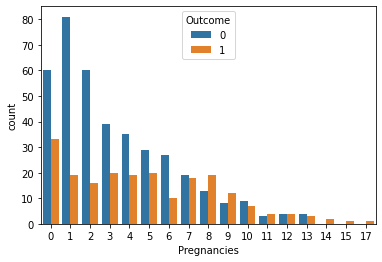

In [9]:
# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns
# посмотрим насколько значим класс билета для выживания пассажира
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = train)

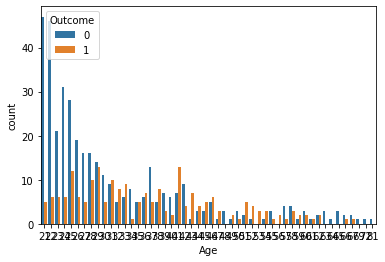

In [10]:
# кто выживал чаще, мужчины или женщины?
sns.countplot(x = 'Age', hue = 'Outcome', data = train)


In [11]:
# выявим пропущенные значения с помощью .isnull() ипосчитаем их количество sum()
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создадим объект этого класса
scaler = StandardScaler()
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])

# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])
# посмотрим на результат
train.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.209955,0.432333,1.413836,1
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.664876,-0.386002,-0.193804,0
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,-1.077297,0.565757,-0.109191,1
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.477412,-0.931558,-1.039930,0
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,1.397227,5.357163,-0.024579,1
5,0.349786,-0.127196,0.272631,-1.284822,-0.682191,-0.789852,-0.830749,-0.278416,0
6,-0.245447,-1.290874,-0.969635,0.714648,0.073311,-0.114982,-0.691395,-0.616867,1
7,1.837868,-0.157819,-3.557690,-1.284822,-0.682191,0.422415,-1.029402,-0.363029,0
8,-0.543063,2.353276,0.065587,1.526932,3.979601,-0.177470,-0.958243,1.667674,1
9,1.242635,0.148412,1.411376,-1.284822,-0.682191,-3.989236,-0.738834,1.752286,1


In [13]:
# поместим в X_train все кроме столбца Survived
X_train = train.drop('Outcome', axis = 1)
# столбец 'Survived' станет нашей целевой переменной (y_train)
y_train = train['Outcome']

In [14]:
X_train.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.209955,0.432333,1.413836
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.664876,-0.386002,-0.193804
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,-1.077297,0.565757,-0.109191
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.477412,-0.931558,-1.039930
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,1.397227,5.357163,-0.024579
5,0.349786,-0.127196,0.272631,-1.284822,-0.682191,-0.789852,-0.830749,-0.278416
6,-0.245447,-1.290874,-0.969635,0.714648,0.073311,-0.114982,-0.691395,-0.616867
7,1.837868,-0.157819,-3.557690,-1.284822,-0.682191,0.422415,-1.029402,-0.363029
8,-0.543063,2.353276,0.065587,1.526932,3.979601,-0.177470,-0.958243,1.667674
9,1.242635,0.148412,1.411376,-1.284822,-0.682191,-3.989236,-0.738834,1.752286


In [15]:
y_train.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [16]:
# импортируем логистическую регрессию из модуляlinear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
# обучим нашу модель
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)

In [18]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)
# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,350,41
1,88,120


In [19]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns =['Прогноз есть диабет', 'Прогноз нетдиабета'], index = ['Факт есть диабет', 'Факт нетдиабета'])
conf_matrix_labels

,Прогноз есть диабет,Прогноз нетдиабета
Факт есть диабет,350,41
Факт нетдиабета,88,120


In [20]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score
# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)
# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.785

In [21]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создадим объект этого класса
scaler = StandardScaler()
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(test[cols_to_scale])

# применим их
test[cols_to_scale] = scaler.transform(test[cols_to_scale])
# посмотрим на результат
test.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.864387,-0.533805,0.902247,-0.092511,-0.729744,-0.702208,-0.127280,-0.789512,0
1,0.608402,-0.944236,-3.665840,-1.297802,-0.729744,-1.160977,-0.811485,-0.442746,0
2,-0.864387,0.013437,0.175505,0.985907,-0.729744,-0.607756,-1.104716,-0.269363,0
3,0.902960,0.902704,0.383146,0.541852,0.408676,0.390740,0.824091,1.811232,1
4,0.019287,2.031390,-3.665840,-1.297802,-0.729744,-0.526797,-0.739806,0.250786,1
5,-0.864387,0.013437,-0.551236,0.732161,-0.729744,0.471700,0.244146,-1.049586,0
6,-0.864387,1.962985,0.383146,1.366525,1.917534,1.038414,2.668186,-0.962894,1
7,-0.864387,-1.081047,-0.447415,0.288107,-0.359306,-1.727691,0.139886,-0.702820,0
8,-1.158945,0.971110,0.590786,1.176216,1.727798,1.240812,-0.550836,-0.529437,0
9,-0.864387,-0.431197,-0.447415,-0.473130,0.914640,-1.120497,-0.980907,-0.876203,0


In [22]:
# для начала дадим датасету привычное название X_test
X_test = test
X_test.drop(['Outcome'], axis = 1, inplace =True)

In [23]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.864387,-0.533805,0.902247,-0.092511,-0.729744,-0.702208,-0.127280,-0.789512
1,0.608402,-0.944236,-3.665840,-1.297802,-0.729744,-1.160977,-0.811485,-0.442746
2,-0.864387,0.013437,0.175505,0.985907,-0.729744,-0.607756,-1.104716,-0.269363
3,0.902960,0.902704,0.383146,0.541852,0.408676,0.390740,0.824091,1.811232
4,0.019287,2.031390,-3.665840,-1.297802,-0.729744,-0.526797,-0.739806,0.250786
...,...,...,...,...,...,...,...,...
163,1.786634,-0.773223,0.279326,1.747143,0.896570,0.080397,-0.873389,2.591455
164,-0.569829,-0.054968,-0.032135,0.414980,-0.729744,0.606632,-0.322767,-0.529437
165,0.313844,-0.089171,0.071685,0.161234,0.282185,-0.823647,-0.632288,-0.269363
166,-0.864387,0.081842,-0.551236,-1.297802,-0.729744,-0.297413,-0.293444,1.204392


In [24]:
y_pred_test = model.predict(X_test)

# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [25]:
len(y_pred_test)

168

In [26]:
# возьмем индекс пассажиров из столбца PassengerId тестовой выборки
ids = [i for i in range(1,169)]
# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это id пассажира, вторая - прогноз "на тесте"
result = pd.DataFrame({'PassengerId': ids,
'Survived': y_pred_test})
# посмотрим, что получилось
result.head()

,PassengerId,Survived
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1


In [27]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!
